[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/EQuS/jaxquantum/blob/main/docs/documentation/getting_started/qarray.ipynb)


In [ ]:
# !pip install git+https://github.com/EQuS/jaxquantum.git # Comment this out if running in colab to install jaxquantum.

In [1]:
import jaxquantum as jqt
import jax.numpy as jnp

# Qarray

The Qarray is the fundamental building block of `jaxquantum`. It is heavily inspired by QuTiP's Qobj and built to be compatible with `JAX` patterns. 

In [2]:
N = 50
state = jqt.basis(N, 0)
displaced_state = jqt.displace(N, 2.0) @ state
displaced_state.to_dm().header

'Quantum array: dims = ((50,), (50,)), bdims = (), shape = (50, 50), type = oper'

(<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>,
 <matplotlib.contour.QuadContourSet at 0x16ba610a0>)

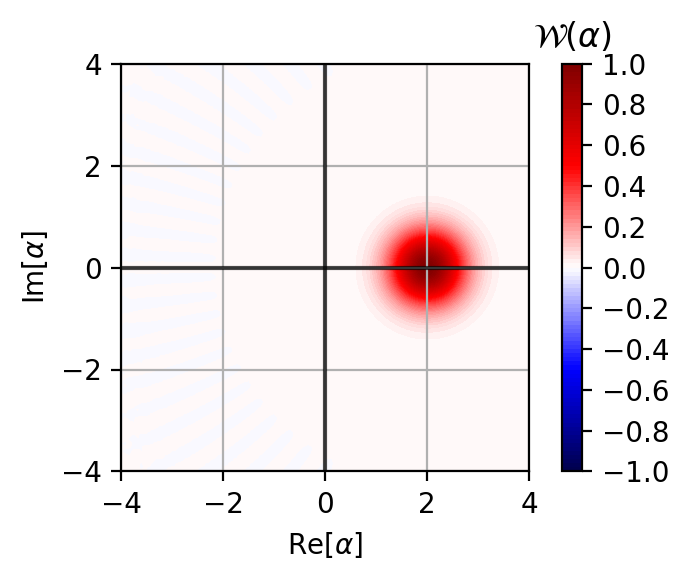

In [3]:
pts = jnp.linspace(-4, 4, 100)
jqt.plot_wigner(displaced_state, pts)

# Batching

A crucial difference between a Qarray and Qobj is its `bdim` or batch dimension. This enables us to seamlessly use batching and numpy broadcasting in calculations using Qarray objects. 

In [4]:
N = 50
state = jqt.basis(N, 0)
displaced_state = jqt.displace(N, jnp.array([[0.0, 0.5, 1.0],[1.5,2.0,2.5]])) @ state

displaced_state.header

'Quantum array: dims = ((50,), (1,)), bdims = (2, 3), shape = (2, 3, 50, 1), type = ket'

(<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>,
 <matplotlib.contour.QuadContourSet at 0x30f62b340>)

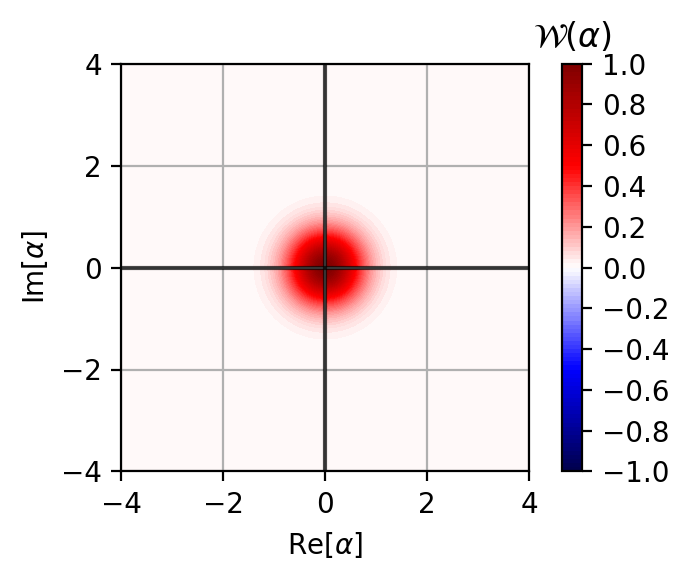

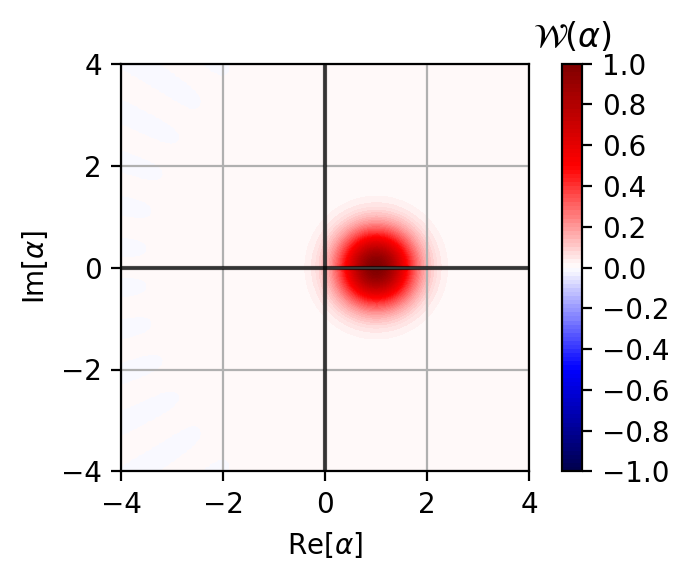

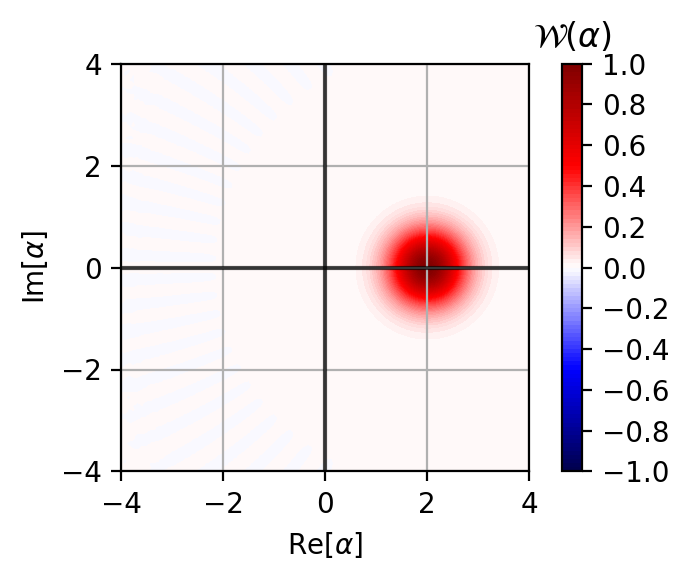

In [5]:
pts = jnp.linspace(-4, 4, 100)
jqt.plot_wigner(displaced_state[0][0], pts)
jqt.plot_wigner(displaced_state[0][2], pts)
jqt.plot_wigner(displaced_state[1][1], pts)

# Constructing a batched Qarray manually

In [6]:
N = 50
a = jqt.displace(N, 0.0)
b = jqt.displace(N, 1.0)
c = jqt.displace(N, 2.0)
arr1 = jqt.Qarray.from_array([[a,b,c],[a,b,c]])
arr2 = jqt.displace(N, jnp.array([[0.0, 1.0, 2.0],[0.0, 1.0, 2.0]]))

jnp.max(jnp.abs(arr1[0][1].data-arr2[0][1].data))

Array(6.10622664e-16, dtype=float64)